In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from ex2 import Autoencoder, train, visualize_reconstruction

# 1. Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

Using cuda device
cuda


In [2]:
# 2. Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
# Initialize model, loss function, optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
train(model, train_loader, criterion, optimizer, epochs=30)

Epoch [1/30], Loss: 0.6417
Epoch [2/30], Loss: 0.6092
Epoch [3/30], Loss: 0.6048
Epoch [4/30], Loss: 0.6028
Epoch [5/30], Loss: 0.6013
Epoch [6/30], Loss: 0.6002
Epoch [7/30], Loss: 0.5993
Epoch [8/30], Loss: 0.5983
Epoch [9/30], Loss: 0.5974
Epoch [10/30], Loss: 0.5967
Epoch [11/30], Loss: 0.5961


KeyboardInterrupt: 

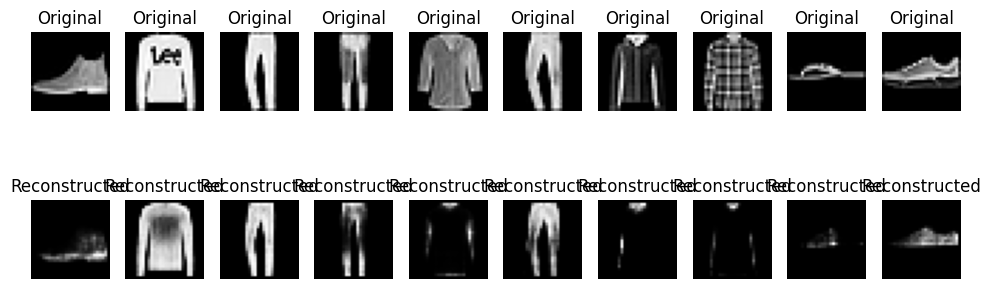

In [6]:
visualize_reconstruction(model, test_loader)
torch.save(model.state_dict(), "autoencoder.pth")